# => Iris Flower Classification

 # Import the imp. Liberary....

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")



In [43]:
# In this we Load the Iris dataset
df = pd.read_csv("Iris.csv")

In [45]:
# In this we Show first few rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df.info()   # In this we Check data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
df.isnull().sum() # in this we Check for missing values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Firstly we are Convert species names to numbers

In [52]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [54]:
df.head() # After converting

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Now we Visualize Feature 

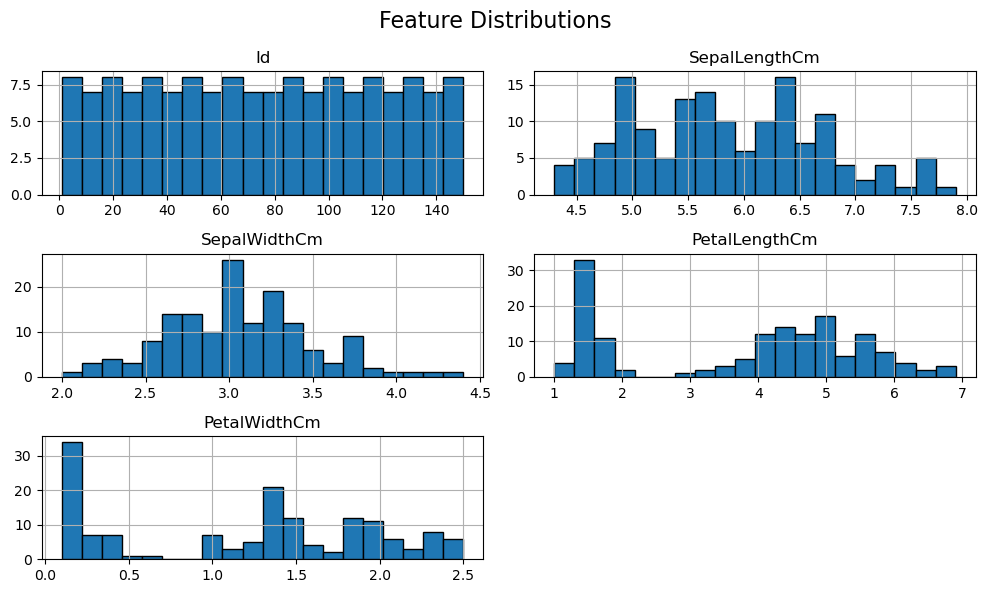

In [57]:
# Step -> 1
df.drop("Species", axis=1).hist(bins=20, edgecolor='black', figsize=(10, 6))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

In [58]:
# In this we are Reloading dataset for proper class labels
df_viz = pd.read_csv("Iris.csv")
df_viz.drop("Id", axis=1, inplace=True)

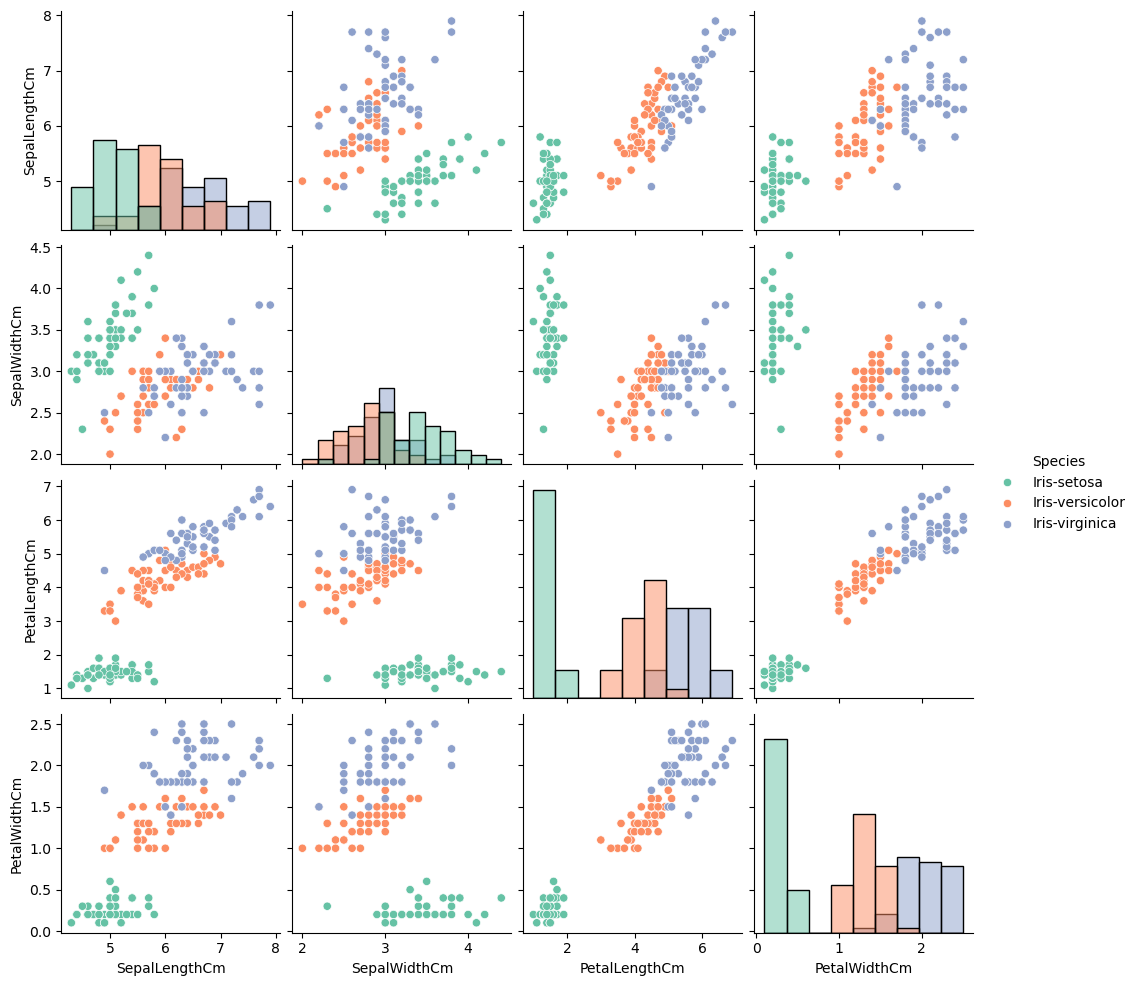

In [59]:
# Step -> 2
# Pairplot with hist on diagonal
sns.pairplot(df_viz, hue='Species', palette='Set2', diag_kind='hist')
plt.show()

# Step -> 3
# Correlation Heatmap

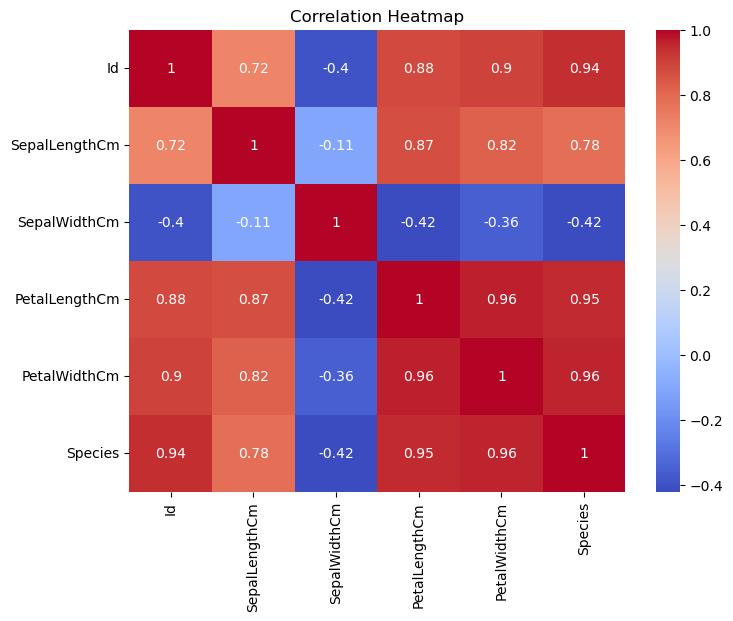

In [64]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Split Data for Training

In [67]:
X = df.drop("Species", axis=1)
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multiple Models

In [70]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    print(f"\\n📌 {name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Confusion Matrix:\\n", confusion_matrix(y_test, preds))
    print("Classification Report:\\n", classification_report(y_test, preds))


\n📌 Logistic Regression
Accuracy: 1.0
Confusion Matrix:\n [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:\n               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

\n📌 Decision Tree
Accuracy: 1.0
Confusion Matrix:\n [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:\n               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

\n📌 